Cleaning data

In [673]:
import numpy as np
import pandas as pd
import os

In [674]:
df = pd.read_excel("./files/Races.xlsx",index_col=0)
gears = np.array([col for col in df.columns if (str(col)[0:4] == "Gear")])
gears
df.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Gear_65,Gear_66,Gear_67,Gear_68,Gear_69,Gear_70,Gear_71,Gear_72,Gear_74,Gear_75
0,0.044609,16,NaN,1,0.017301,NaN,NaN,0.000487,0.000278,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.045742,16,0.001133,2,NaN,NaN,0.000366,0.000488,0.000279,0.044975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.046879,16,0.001137,3,NaN,NaN,0.000366,0.000491,0.000280,0.046108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.048018,16,0.001139,4,NaN,NaN,0.000366,0.000492,0.000281,0.047245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.049158,16,0.001140,5,NaN,NaN,0.000366,0.000493,0.000281,0.048384,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To the Races dataframe we merged gear data from telemetries. Gear should go from 1 to 8 for the 2022 competition.

In [675]:
gear_numbers = np.array([str(gear.split("_")[1]) if "_" in gear else 0 for gear in gears])
np.array(gear_numbers)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '74', '75'], dtype='<U11')

In [676]:
np.array(gear_numbers[8:])

array(['8', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '74', '75'],
      dtype='<U11')

In [677]:
check_gears = ['Gear']
[check_gears.append('Gear_' + gear) for gear in gear_numbers[9:]]
np.array(check_gears)

array(['Gear', 'Gear_10', 'Gear_11', 'Gear_12', 'Gear_13', 'Gear_14',
       'Gear_15', 'Gear_16', 'Gear_17', 'Gear_18', 'Gear_19', 'Gear_20',
       'Gear_21', 'Gear_22', 'Gear_23', 'Gear_24', 'Gear_25', 'Gear_26',
       'Gear_27', 'Gear_28', 'Gear_29', 'Gear_30', 'Gear_31', 'Gear_32',
       'Gear_33', 'Gear_34', 'Gear_35', 'Gear_36', 'Gear_37', 'Gear_38',
       'Gear_39', 'Gear_40', 'Gear_41', 'Gear_42', 'Gear_43', 'Gear_44',
       'Gear_45', 'Gear_46', 'Gear_47', 'Gear_48', 'Gear_49', 'Gear_50',
       'Gear_51', 'Gear_52', 'Gear_53', 'Gear_54', 'Gear_55', 'Gear_56',
       'Gear_57', 'Gear_58', 'Gear_59', 'Gear_60', 'Gear_61', 'Gear_62',
       'Gear_63', 'Gear_64', 'Gear_65', 'Gear_66', 'Gear_67', 'Gear_68',
       'Gear_69', 'Gear_70', 'Gear_71', 'Gear_72', 'Gear_74', 'Gear_75'],
      dtype='<U7')

In [678]:
df_gear = df.loc[df['IsAccurate'] == True, check_gears]
df_gear

,Gear,Gear_10,Gear_11,Gear_12,Gear_13,Gear_14,Gear_15,Gear_16,Gear_17,Gear_18,...,Gear_65,Gear_66,Gear_67,Gear_68,Gear_69,Gear_70,Gear_71,Gear_72,Gear_74,Gear_75
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [679]:
df_gear.dropna()

,Gear,Gear_10,Gear_11,Gear_12,Gear_13,Gear_14,Gear_15,Gear_16,Gear_17,Gear_18,...,Gear_65,Gear_66,Gear_67,Gear_68,Gear_69,Gear_70,Gear_71,Gear_72,Gear_74,Gear_75


We see that these columns do not apply to the laps that were labeled as Accurate. We will not consider those columns as we will work only with these laps.

In [680]:
df_clean = df.loc[df['IsAccurate'] == True]
df_clean = df_clean.drop(columns=check_gears)
df_clean.head()

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,EventName,EventDate,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6,Gear_7,Gear_8
1,0.045742,16,0.001133,2,NaN,NaN,0.000366,0.000488,0.000279,0.044975,...,Bahrain Grand Prix,2022-03-20 20:00:00,NaN,0.028852,0.065416,0.155960,0.193788,0.232724,0.256050,0.066295
2,0.046879,16,0.001137,3,NaN,NaN,0.000366,0.000491,0.000280,0.046108,...,Bahrain Grand Prix,2022-03-20 20:00:00,NaN,0.023553,0.070947,0.167017,0.165758,0.247971,0.257159,0.066564
3,0.048018,16,0.001139,4,NaN,NaN,0.000366,0.000492,0.000281,0.047245,...,Bahrain Grand Prix,2022-03-20 20:00:00,NaN,0.030494,0.089588,0.129072,0.200625,0.226650,0.249251,0.074033
4,0.049158,16,0.001140,5,NaN,NaN,0.000366,0.000493,0.000281,0.048384,...,Bahrain Grand Prix,2022-03-20 20:00:00,NaN,0.032331,0.069473,0.151440,0.195420,0.217773,0.254294,0.075392
5,0.050301,16,0.001143,6,NaN,NaN,0.000366,0.000494,0.000283,0.049524,...,Bahrain Grand Prix,2022-03-20 20:00:00,NaN,0.031369,0.075189,0.156269,0.174956,0.227540,0.255542,0.076313


In [681]:
df_clean['Compound'].unique()

array(['SOFT', 'MEDIUM', 'HARD', 'INTERMEDIATE', 'WET'], dtype=object)

In [682]:
rainy_events = df_clean.loc[(df_clean['Compound']  == 'INTERMEDIATE') | (df_clean['Compound'] == 'WET'),'EventName'].unique()
rainy_events

array(['Emilia Romagna Grand Prix', 'Monaco Grand Prix',
       'Singapore Grand Prix', 'Japanese Grand Prix'], dtype=object)

In [683]:
max(df_clean.loc[df_clean['EventName'] == 'Japanese Grand Prix', "LapNumber"])

28

Rain is difficult to measure. Since our rain data (weather dataframe) is boolean, and intensity is important for this analysis. We will also consider compound as one of our main covariates, and since we have few observations with Intermediate and Wet tyres, we would not be able to model them properly. Nonetheless, for the Japanese Grand Prix, although the race has 53 laps, due to issues during the event the data only has 28 laps. For this project we decided to remove rainy events.

In [684]:
rainy_events = df_clean.loc[(df_clean['Compound']  == 'INTERMEDIATE') | (df_clean['Compound'] == 'WET'),'EventName'].unique()
rainy_events

array(['Emilia Romagna Grand Prix', 'Monaco Grand Prix',
       'Singapore Grand Prix', 'Japanese Grand Prix'], dtype=object)

In [685]:
df_clean = df_clean.loc[~df_clean['EventName'].isin(rainy_events)]
df_clean.EventName.unique()

array(['Bahrain Grand Prix', 'Saudi Arabian Grand Prix',
       'Australian Grand Prix', 'Miami Grand Prix', 'Spanish Grand Prix',
       'Azerbaijan Grand Prix', 'Canadian Grand Prix',
       'British Grand Prix', 'Austrian Grand Prix', 'French Grand Prix',
       'Hungarian Grand Prix', 'Belgian Grand Prix', 'Dutch Grand Prix',
       'Italian Grand Prix', 'United States Grand Prix',
       'Mexico City Grand Prix', 'São Paulo Grand Prix',
       'Abu Dhabi Grand Prix'], dtype=object)

We still have anomalies in our dataset. To check them, we can check the scatter plot for each event.

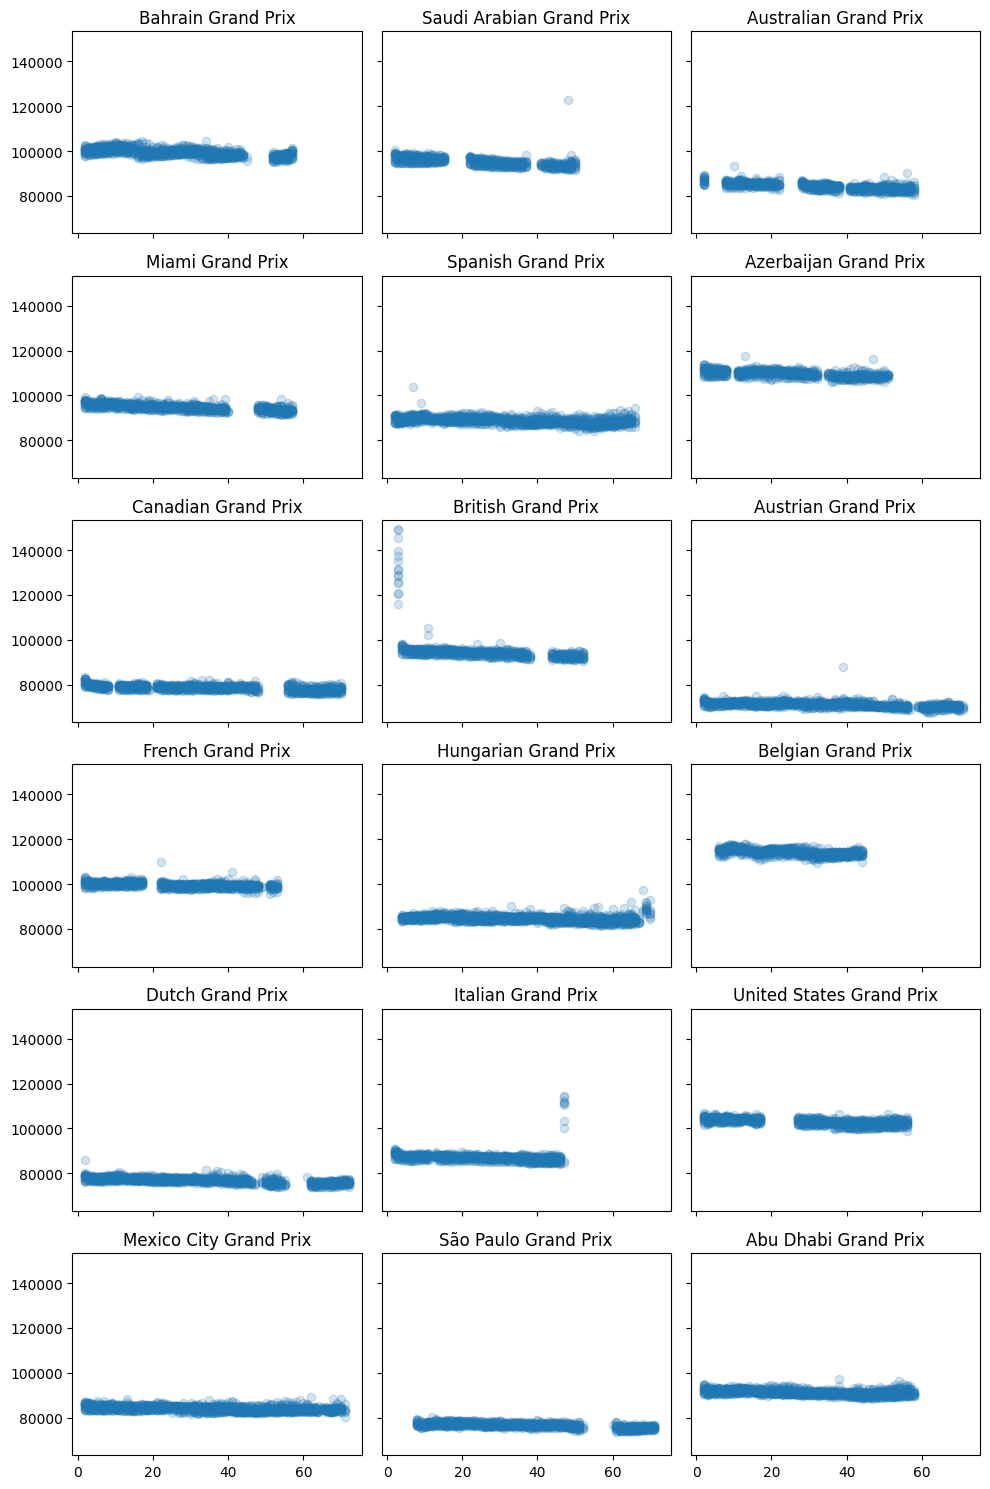

In [686]:
import matplotlib.pyplot as plt

# Set up the subplot layout
fig, ax = plt.subplots(6, 3, figsize=(10, 15), sharex=True, sharey=True)

# Flatten the axes array
ax = ax.flatten()

# Get the event names
event_names = df_clean['EventName'].unique()

# Loop over the event names and axes
for event, ax in zip(event_names, ax):
    # Select the data for the current event
    event_data = df_clean[df_clean['EventName'] == event]
    
    # Create the plot
    ax.scatter(event_data['LapNumber'], event_data['msLapTime'],alpha=0.2)
    ax.set_title(event)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [687]:
mean_laptime_british = df_clean.loc[df['EventName'] == 'British Grand Prix'].groupby('LapNumber')['msLapTime'].mean().reset_index()
mean_laptime_british

,LapNumber,msLapTime
0,3,132268.733333
1,4,96290.764706
2,5,95341.375000
3,6,94985.200000
4,7,94932.500000
5,8,94912.941176
6,9,94930.176471
7,10,94944.411765
8,11,95901.470588
9,12,94991.750000


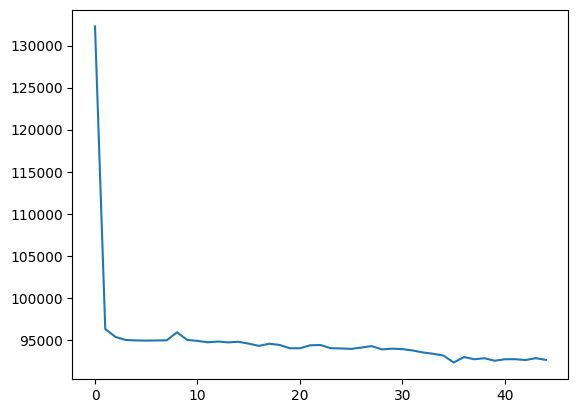

In [688]:
plt.plot(mean_laptime_british['msLapTime'])

It is easy to notice that lap number 3 has a mean laptime way above the other laps. If we check 2022 British Grand Prix, we we will see that the race was stopped, reason why Lap number 2 was not considered when we filtered IsAccurate = True. 

However, even though there was no safety car, it still impacted lap number 3. We will desconsider this lap.

In [689]:
df_clean.loc[((df_clean['EventName'] == 'British Grand Prix') & (df_clean['LapNumber'] == 3))]

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,EventName,EventDate,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6,Gear_7,Gear_8
9784,0.083640,11,0.001728,3,NaN,NaN,0.000960,0.000464,0.000305,0.082872,...,British Grand Prix,2022-07-03 17:00:00,0.023558,0.043939,0.112154,0.075616,0.152613,0.219869,0.290506,0.076950
9836,0.083654,44,0.001685,3,NaN,NaN,0.000907,0.000471,0.000308,0.082876,...,British Grand Prix,2022-07-03 17:00:00,0.031832,0.012442,0.105009,0.064395,0.121733,0.249284,0.257269,0.153801
9888,0.083623,16,0.001727,3,NaN,NaN,0.000974,0.000453,0.000300,0.082869,...,British Grand Prix,2022-07-03 17:00:00,0.025143,0.011340,0.105984,0.058206,0.133801,0.193703,0.300339,0.161892
9940,0.083666,14,0.001588,3,NaN,NaN,0.000802,0.000474,0.000313,0.082879,...,British Grand Prix,2022-07-03 17:00:00,0.016443,0.085896,0.076162,0.086354,0.221249,0.212143,0.224821,0.074309
9992,0.083646,4,0.001616,3,NaN,NaN,0.000844,0.000466,0.000305,0.082875,...,British Grand Prix,2022-07-03 17:00:00,0.022244,0.041087,0.114256,0.064263,0.169463,0.229789,0.278461,0.076198
10096,0.083706,47,0.001393,3,NaN,NaN,0.000597,0.000482,0.000313,0.082910,...,British Grand Prix,2022-07-03 17:00:00,0.008873,0.002559,0.065350,0.114778,0.172584,0.269080,0.241386,0.122036
10148,0.083691,5,0.001397,3,NaN,NaN,0.000607,0.000479,0.000311,0.082900,...,British Grand Prix,2022-07-03 17:00:00,0.014761,0.020084,0.083845,0.103066,0.174727,0.218630,0.258280,0.120973
10200,0.083695,20,0.001455,3,NaN,NaN,0.000659,0.000484,0.000311,0.082900,...,British Grand Prix,2022-07-03 17:00:00,0.008966,0.020235,0.115316,0.055804,0.194599,0.235504,0.266527,0.097862
10252,0.083702,18,0.001341,3,NaN,NaN,0.000542,0.000486,0.000313,0.082903,...,British Grand Prix,2022-07-03 17:00:00,0.008587,0.019833,0.116979,0.064422,0.178599,0.245363,0.218311,0.143977
10304,0.083674,6,0.001566,3,NaN,NaN,0.000774,0.000481,0.000311,0.082882,...,British Grand Prix,2022-07-03 17:00:00,0.015405,0.035177,0.078310,0.106589,0.131336,0.173786,0.203747,0.249198


In [690]:
df_clean = df_clean.loc[~((df_clean['EventName'] == 'British Grand Prix') & (df_clean['LapNumber'] == 3))]

In [691]:
mean_laptime_italian = df_clean.loc[df['EventName'] == 'Italian Grand Prix'].groupby('LapNumber')['msLapTime'].mean().reset_index()
mean_laptime_italian

,LapNumber,msLapTime
0,2,88890.400000
1,3,87987.150000
2,4,87455.900000
3,5,87352.700000
4,6,87308.750000
5,7,87253.473684
6,8,87418.526316
7,9,87533.150000
8,10,87458.400000
9,11,87585.411765


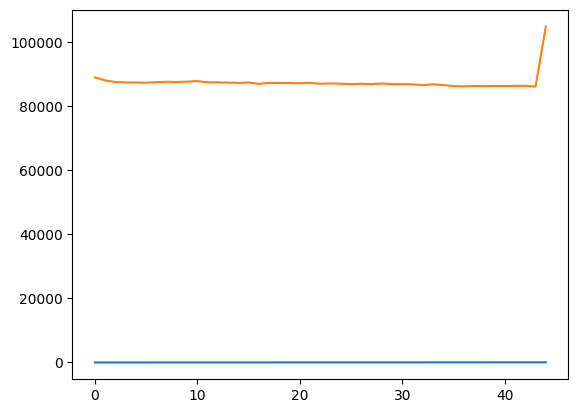

In [692]:
plt.plot(mean_laptime_italian)

We see that lap 47 for the italian grand prix also needs to be disconsidered.

In [693]:
df_clean = df_clean.loc[~((df_clean['EventName'] == 'Italian Grand Prix') & (df_clean['LapNumber'] == 47))]

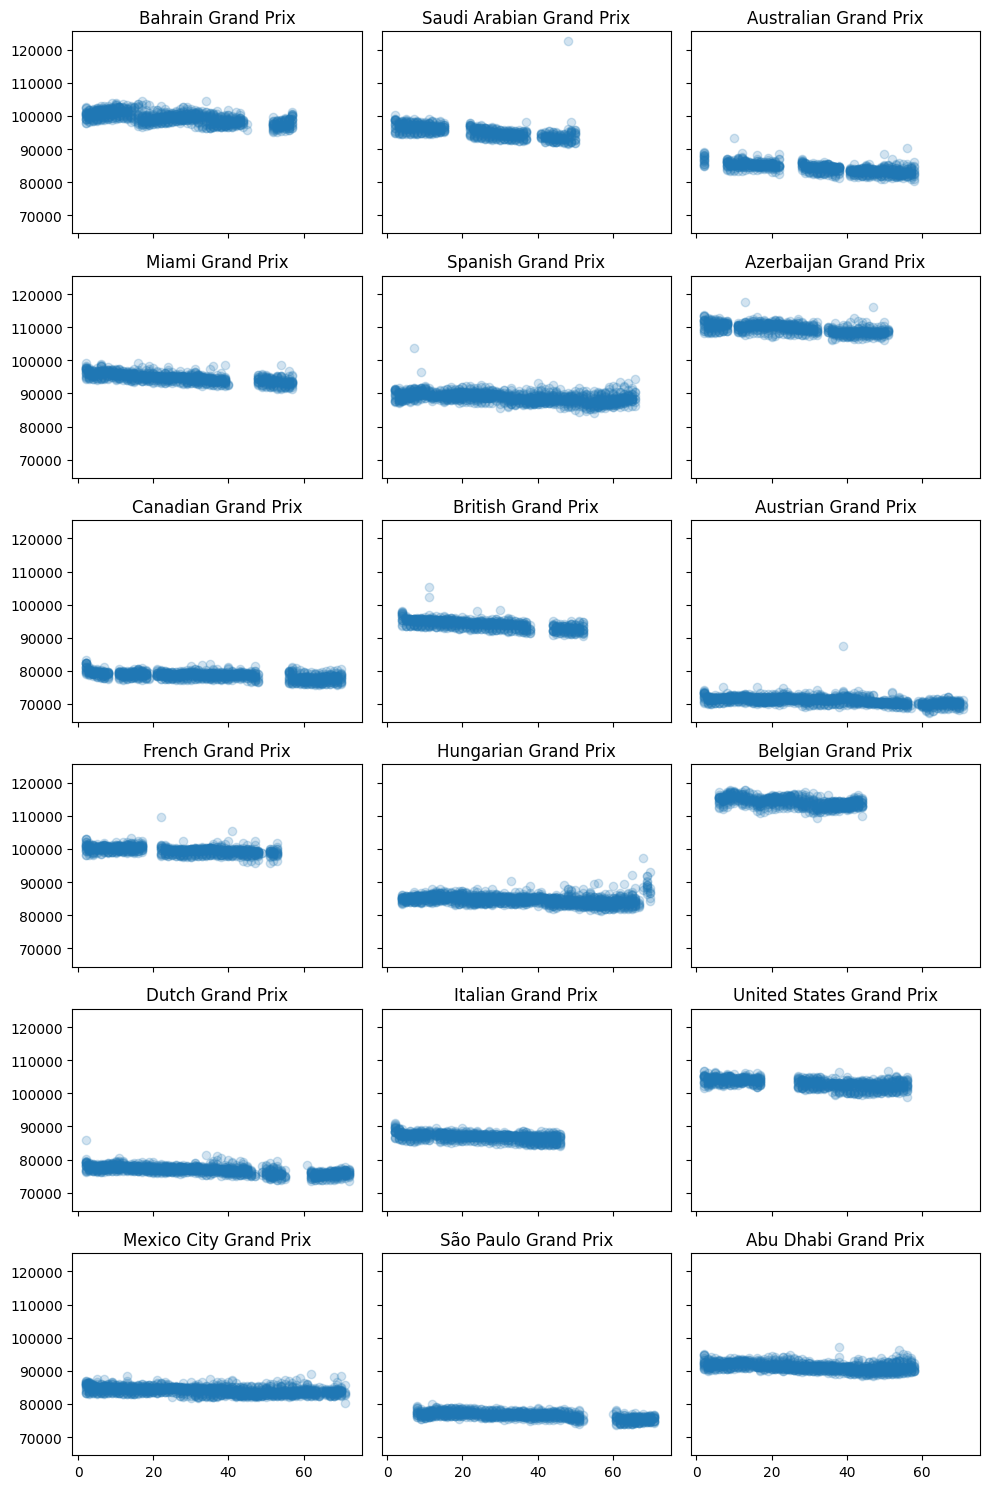

In [694]:
import matplotlib.pyplot as plt

# Set up the subplot layout
fig, ax = plt.subplots(6, 3, figsize=(10, 15), sharex=True, sharey=True)

# Flatten the axes array
ax = ax.flatten()

# Get the event names
event_names = df_clean['EventName'].unique()

# Loop over the event names and axes
for event, ax in zip(event_names, ax):
    # Select the data for the current event
    event_data = df_clean[df_clean['EventName'] == event]
    
    # Create the plot
    ax.scatter(event_data['LapNumber'], event_data['msLapTime'],alpha=0.2)
    ax.set_title(event)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Now laps 3 and 47 for British and Italian GPs, repectively, have been removed. However, there as still outliers that seems to be happening for just one driver, therefore avareging for each lapnumber is not the best approach.

Saudi Arabia and Austrian Grand Prix also seems to have to points that are way above the rest. Let's check them out.

In [695]:
df_saudi = df_clean[df_clean['EventName'] == 'Saudi Arabian Grand Prix']
df_austrian = df_clean[df_clean['EventName'] == 'Austrian Grand Prix']

In [696]:
df_saudi[df_saudi['msLapTime'] == df_saudi['msLapTime'].max()][['Driver','LapNumber','msLapTime']]

,Driver,LapNumber,msLapTime
1770,STR,48,122768.0


In [697]:
df_austrian[df_austrian['msLapTime'] == df_austrian['msLapTime'].max()][['Driver','LapNumber','msLapTime']]

,Driver,LapNumber,msLapTime
11707,VET,39,87630.0


In [698]:
condition_1 = (df_clean['EventName'] == 'Saudi Arabian Grand Prix') & (df_clean['msLapTime'] == df_saudi['msLapTime'].max())
condition_2 = (df_clean['EventName'] == 'Austrian Grand Prix') & (df_clean['msLapTime'] == df_austrian['msLapTime'].max())

In [699]:
df_clean = df_clean[~(condition_1 | condition_2)]

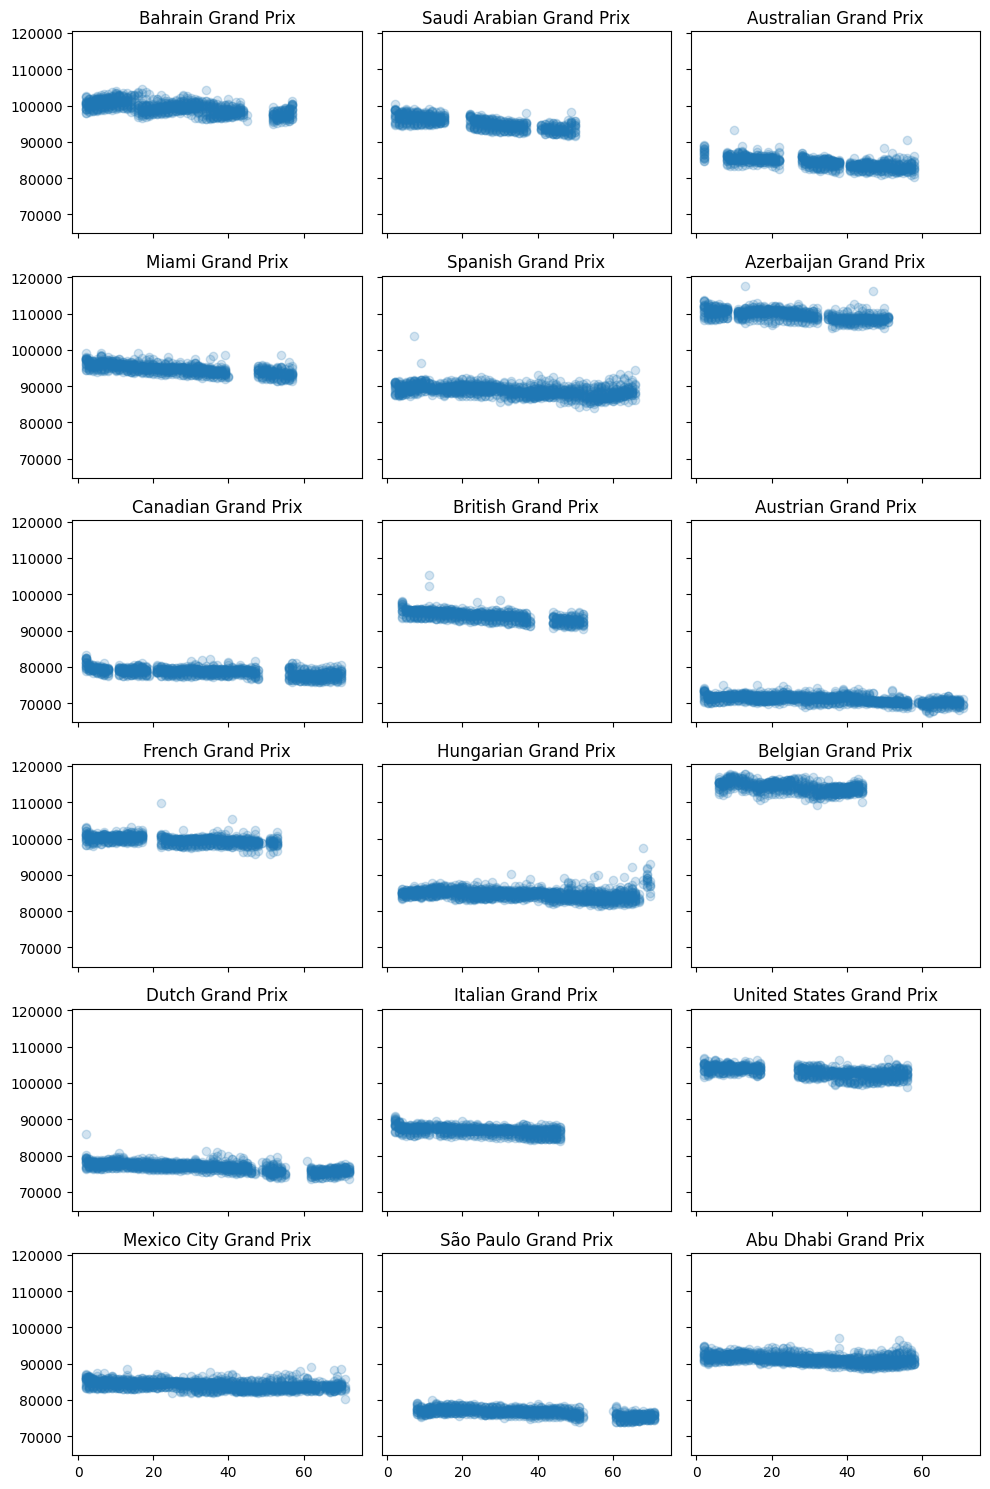

In [700]:
import matplotlib.pyplot as plt

# Set up the subplot layout
fig, ax = plt.subplots(6, 3, figsize=(10, 15), sharex=True, sharey=True)

# Flatten the axes array
ax = ax.flatten()

# Get the event names
event_names = df_clean['EventName'].unique()

# Loop over the event names and axes
for event, ax in zip(event_names, ax):
    # Select the data for the current event
    event_data = df_clean[df_clean['EventName'] == event]
    
    # Create the plot
    ax.scatter(event_data['LapNumber'], event_data['msLapTime'],alpha=0.2)
    ax.set_title(event)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

We have dealt with major issues. Though we can still easily identify a few outliers, it is usual in this competition. We will proceed with this set of data for now.

In [701]:
df_circuit = pd.read_excel('./files/Circuit Info/Circuit.xlsx')
df_circuit

,EventName,EventNameBrazilianPortuguese,PlaceBrazilianPortuguese,Soft,Medium,Hard,Lenght,Laps,Race
0,Bahrain Grand Prix,Grande Prêmio do Bahrein,Bahrein,C3,C2,C1,5.412,57,308.328
1,Saudi Arabian Grand Prix,Grande Prêmio da Arábia Saudita,Arábia Saudita,C4,C3,C2,6.174,50,308.450
2,Australian Grand Prix,Grande Prêmio da Austrália,Austrália,C5,C3,C2,5.303,58,307.574
3,Emilia Romagna Grand Prix,Grande Prêmio Emília-Romanha,Romanha,C4,C3,C2,4.909,63,309.049
4,Miami Grand Prix,Grande Prêmio de Miami,Miami,C4,C3,C2,5.412,57,308.326
5,Spanish Grand Prix,Grande Prêmio da Espanha,Espanha,C3,C2,C1,4.675,66,308.424
6,Monaco Grand Prix,Grande Prêmio de Mônaco,Mônaco,C5,C4,C3,3.337,78,260.286
7,Azerbaijan Grand Prix,Grande Prêmio do Azerbaijão,Azerbaijão,C5,C4,C3,6.003,51,306.049
8,Canadian Grand Prix,Grande Prêmio do Canadá,Canadá,C5,C4,C3,4.361,70,305.270
9,British Grand Prix,Grande Prêmio da Inglaterra,Inglaterra,C3,C2,C1,5.891,52,306.198


We have collected data from each Grand Prix. We will use this data in our Race dataframe.

In [702]:
pd.merge(df_clean,df_circuit,how = 'left', on = 'EventName').shape

(16310, 46)

In [703]:
df_clean.shape

(16310, 38)

No rows were added, just columns, as expected, so we can apply the merge.

In [704]:
df_clean = pd.merge(df_clean,df_circuit,how = 'left', on = 'EventName')
df_clean

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Gear_7,Gear_8,EventNameBrazilianPortuguese,PlaceBrazilianPortuguese,Soft,Medium,Hard,Lenght,Laps,Race
0,0.045742,16,0.001133,2,NaN,NaN,0.000366,0.000488,0.000279,0.044975,...,0.256050,0.066295,Grande Prêmio do Bahrein,Bahrein,C3,C2,C1,5.412,57,308.328
1,0.046879,16,0.001137,3,NaN,NaN,0.000366,0.000491,0.000280,0.046108,...,0.257159,0.066564,Grande Prêmio do Bahrein,Bahrein,C3,C2,C1,5.412,57,308.328
2,0.048018,16,0.001139,4,NaN,NaN,0.000366,0.000492,0.000281,0.047245,...,0.249251,0.074033,Grande Prêmio do Bahrein,Bahrein,C3,C2,C1,5.412,57,308.328
3,0.049158,16,0.001140,5,NaN,NaN,0.000366,0.000493,0.000281,0.048384,...,0.254294,0.075392,Grande Prêmio do Bahrein,Bahrein,C3,C2,C1,5.412,57,308.328
4,0.050301,16,0.001143,6,NaN,NaN,0.000366,0.000494,0.000283,0.049524,...,0.255542,0.076313,Grande Prêmio do Bahrein,Bahrein,C3,C2,C1,5.412,57,308.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16305,0.066975,14,0.001055,22,NaN,NaN,0.000215,0.000445,0.000395,0.066135,...,0.152146,0.177608,Grande Prêmio de Abu Dhabi,Abu Dhabi,C5,C4,C3,5.281,58,306.183
16306,0.068038,14,0.001063,23,NaN,NaN,0.000213,0.000450,0.000400,0.067188,...,0.166788,0.150471,Grande Prêmio de Abu Dhabi,Abu Dhabi,C5,C4,C3,5.281,58,306.183
16307,0.069086,14,0.001048,24,NaN,NaN,0.000212,0.000445,0.000391,0.068250,...,0.156593,0.181069,Grande Prêmio de Abu Dhabi,Abu Dhabi,C5,C4,C3,5.281,58,306.183
16308,0.070140,14,0.001054,25,NaN,NaN,0.000212,0.000454,0.000388,0.069299,...,0.238710,0.063762,Grande Prêmio de Abu Dhabi,Abu Dhabi,C5,C4,C3,5.281,58,306.183


In [705]:
df_clean['TyreType'] = df_clean.apply(lambda x: x['Soft'] if x['Compound'] == 'SOFT' else (x['Medium'] if x['Compound'] == 'MEDIUM' else x['Hard']), axis=1)

In [706]:
df_clean[['Compound','Soft','Medium','Hard','TyreType']].drop_duplicates()

,Compound,Soft,Medium,Hard,TyreType
0,SOFT,C3,C2,C1,C3
27,MEDIUM,C3,C2,C1,C2
99,HARD,C3,C2,C1,C1
872,MEDIUM,C4,C3,C2,C3
886,HARD,C4,C3,C2,C2
1504,MEDIUM,C5,C3,C2,C3
1519,HARD,C5,C3,C2,C2
2641,SOFT,C4,C3,C2,C4
4234,MEDIUM,C5,C4,C3,C4
4248,HARD,C5,C4,C3,C3


In [707]:
df_clean = df_clean.drop(columns=['Soft','Medium','Hard'])

We now have circuit length, total laps of the circuit, and we no which tyre was being used, since the definition for soft, medium and hard depends on the events.

We will add Stints information for each lap. It will help us in our plots.

In [708]:
df_clean['Stint'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [709]:
[i for i in range(1,7)]

[1, 2, 3, 4, 5, 6]

In [710]:
for i in range(1, 7):
    df_clean['Stint_{}'.format(i)] = df_clean.apply(lambda x: x['LapNumber'] if x['Stint'] == i else None, axis=1)
    df_clean['Stint_{}'.format(i)] = df_clean.groupby(['Driver', 'EventName'])['Stint_{}'.format(i)].transform('first')

In [711]:
df_clean.columns

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Stint', 'LapStartTime', 'Team',
       'Driver', 'TrackStatus', 'IsAccurate', 'LapStartDate', 'msLapTime',
       'EventName', 'EventDate', 'Gear_1', 'Gear_2', 'Gear_3', 'Gear_4',
       'Gear_5', 'Gear_6', 'Gear_7', 'Gear_8', 'EventNameBrazilianPortuguese',
       'PlaceBrazilianPortuguese', 'Lenght', 'Laps', 'Race', 'TyreType',
       'Stint_1', 'Stint_2', 'Stint_3', 'Stint_4', 'Stint_5', 'Stint_6'],
      dtype='object')

In [712]:
df_clean[['Stint','LapNumber','Stint_1','Stint_2','Stint_3','Stint_4','Stint_5','Stint_6','Driver','EventName']].groupby(['Driver','EventName']).min().reset_index()

,Driver,EventName,Stint,LapNumber,Stint_1,Stint_2,Stint_3,Stint_4,Stint_5,Stint_6
0,ALB,Abu Dhabi Grand Prix,1,2,2.0,14.0,37.0,NaN,NaN,NaN
1,ALB,Australian Grand Prix,1,2,2.0,NaN,NaN,NaN,NaN,NaN
2,ALB,Austrian Grand Prix,1,2,2.0,13.0,14.0,NaN,NaN,NaN
3,ALB,Azerbaijan Grand Prix,1,2,2.0,11.0,31.0,NaN,NaN,NaN
4,ALB,Bahrain Grand Prix,1,2,2.0,15.0,37.0,52.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
344,ZHO,Miami Grand Prix,1,2,2.0,NaN,NaN,NaN,NaN,NaN
345,ZHO,Saudi Arabian Grand Prix,1,2,2.0,22.0,29.0,NaN,NaN,NaN
346,ZHO,Spanish Grand Prix,1,2,2.0,12.0,NaN,NaN,NaN,NaN
347,ZHO,São Paulo Grand Prix,1,8,8.0,18.0,39.0,NaN,NaN,NaN


In [713]:
df_clean.loc[df_clean['Driver'] == 'ALB'][['Stint','LapNumber','Stint_1','Stint_2','Stint_3','Stint_4','Stint_5','Stint_6','Driver','EventName']].groupby(['Driver','EventName']).max().reset_index()

,Driver,EventName,Stint,LapNumber,Stint_1,Stint_2,Stint_3,Stint_4,Stint_5,Stint_6
0,ALB,Abu Dhabi Grand Prix,3,57,2.0,14.0,37.0,NaN,NaN,NaN
1,ALB,Australian Grand Prix,1,56,2.0,NaN,NaN,NaN,NaN,NaN
2,ALB,Austrian Grand Prix,3,70,2.0,13.0,14.0,NaN,NaN,NaN
3,ALB,Azerbaijan Grand Prix,3,50,2.0,11.0,31.0,NaN,NaN,NaN
4,ALB,Bahrain Grand Prix,4,57,2.0,15.0,37.0,52.0,NaN,NaN
5,ALB,Belgian Grand Prix,3,44,6.0,12.0,28.0,NaN,NaN,NaN
6,ALB,Canadian Grand Prix,3,70,2.0,21.0,56.0,NaN,NaN,NaN
7,ALB,Dutch Grand Prix,5,72,2.0,23.0,44.0,NaN,62.0,NaN
8,ALB,French Grand Prix,2,53,2.0,22.0,NaN,NaN,NaN,NaN
9,ALB,Hungarian Grand Prix,4,69,NaN,4.0,23.0,42.0,NaN,NaN


Here is an example for a driver. He had issues in the Hungarian Grand Prix, for example. He had no "valid" lap during his first Stint. We will fill missing values for stint 1 with his first valid lap, and fill the rest of missing values with his last lap.

In [714]:
df_clean['Stint_1'] = df_clean['Stint_1'].fillna(df_clean.groupby(['Driver', 'EventName'])['LapNumber'].transform('min'))

In [715]:
for i in range(2, 7):
    df_clean['Stint_{}'.format(i)] = df_clean['Stint_{}'.format(i)].fillna(df_clean.groupby(['Driver', 'EventName'])['LapNumber'].transform('max'))

In [716]:
df_clean.loc[df_clean['Driver'] == 'ALB'][['Stint','LapNumber','Stint_1','Stint_2','Stint_3','Stint_4','Stint_5','Stint_6','Driver','EventName']].groupby(['Driver','EventName']).max().reset_index()

,Driver,EventName,Stint,LapNumber,Stint_1,Stint_2,Stint_3,Stint_4,Stint_5,Stint_6
0,ALB,Abu Dhabi Grand Prix,3,57,2.0,14.0,37.0,57.0,57.0,57.0
1,ALB,Australian Grand Prix,1,56,2.0,56.0,56.0,56.0,56.0,56.0
2,ALB,Austrian Grand Prix,3,70,2.0,13.0,14.0,70.0,70.0,70.0
3,ALB,Azerbaijan Grand Prix,3,50,2.0,11.0,31.0,50.0,50.0,50.0
4,ALB,Bahrain Grand Prix,4,57,2.0,15.0,37.0,52.0,57.0,57.0
5,ALB,Belgian Grand Prix,3,44,6.0,12.0,28.0,44.0,44.0,44.0
6,ALB,Canadian Grand Prix,3,70,2.0,21.0,56.0,70.0,70.0,70.0
7,ALB,Dutch Grand Prix,5,72,2.0,23.0,44.0,72.0,62.0,72.0
8,ALB,French Grand Prix,2,53,2.0,22.0,53.0,53.0,53.0,53.0
9,ALB,Hungarian Grand Prix,4,69,4.0,4.0,23.0,42.0,69.0,69.0


Finally, drivers are usually known for their last name. Will add lastname and teamcolor data, and consider 20 drivers. de Vries and Hulkenberg will have their data added to their teammates Albon and Vettel who disputed 21 and 20 from 22 races, respectively. To be clear, we will use Albon* and Vettel*.

In [717]:
df_driver = pd.read_excel("./files/Driver Race Info.xlsx",index_col=0)
df_driver

,EventName,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
0,Bahrain Grand Prix,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1,1,NaN,NaN,NaN,0.067750,Finished,26
0,Bahrain Grand Prix,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2,3,NaN,NaN,NaN,0.067815,Finished,18
0,Bahrain Grand Prix,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3,5,NaN,NaN,NaN,0.067862,Finished,15
0,Bahrain Grand Prix,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4,9,NaN,NaN,NaN,0.067880,Finished,12
0,Bahrain Grand Prix,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,5,7,NaN,NaN,NaN,0.067921,Finished,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Abu Dhabi Grand Prix,47,M SCHUMACHER,MSC,Haas F1 Team,b6babd,Mick,Schumacher,Mick Schumacher,16,12,NaN,NaN,NaN,NaN,+1 Lap,0
0,Abu Dhabi Grand Prix,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,17,16,NaN,NaN,NaN,NaN,+1 Lap,0
0,Abu Dhabi Grand Prix,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,18,5,NaN,NaN,NaN,NaN,Hydraulics,0
0,Abu Dhabi Grand Prix,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,19,20,NaN,NaN,NaN,NaN,Collision damage,0


In [718]:
pd.merge(df_clean,df_driver[['DriverNumber','TeamColor','LastName','GridPosition','EventName']],on=['DriverNumber','EventName'],how = 'left')

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,TyreType,Stint_1,Stint_2,Stint_3,Stint_4,Stint_5,Stint_6,TeamColor,LastName,GridPosition
0,0.045742,16,0.001133,2,NaN,NaN,0.000366,0.000488,0.000279,0.044975,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,ed1c24,Leclerc,1
1,0.046879,16,0.001137,3,NaN,NaN,0.000366,0.000491,0.000280,0.046108,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,ed1c24,Leclerc,1
2,0.048018,16,0.001139,4,NaN,NaN,0.000366,0.000492,0.000281,0.047245,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,ed1c24,Leclerc,1
3,0.049158,16,0.001140,5,NaN,NaN,0.000366,0.000493,0.000281,0.048384,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,ed1c24,Leclerc,1
4,0.050301,16,0.001143,6,NaN,NaN,0.000366,0.000494,0.000283,0.049524,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,ed1c24,Leclerc,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16305,0.066975,14,0.001055,22,NaN,NaN,0.000215,0.000445,0.000395,0.066135,...,C3,2.0,21.0,26.0,26.0,26.0,26.0,2293d1,Alonso,10
16306,0.068038,14,0.001063,23,NaN,NaN,0.000213,0.000450,0.000400,0.067188,...,C3,2.0,21.0,26.0,26.0,26.0,26.0,2293d1,Alonso,10
16307,0.069086,14,0.001048,24,NaN,NaN,0.000212,0.000445,0.000391,0.068250,...,C3,2.0,21.0,26.0,26.0,26.0,26.0,2293d1,Alonso,10
16308,0.070140,14,0.001054,25,NaN,NaN,0.000212,0.000454,0.000388,0.069299,...,C3,2.0,21.0,26.0,26.0,26.0,26.0,2293d1,Alonso,10


In [719]:
df_clean = pd.merge(df_clean,df_driver[['DriverNumber','TeamColor','LastName','GridPosition','EventName']],on=['DriverNumber','EventName'],how = 'left')
df_clean['LastName'].unique()

array(['Leclerc', 'Sainz', 'Hamilton', 'Russell', 'Magnussen', 'Bottas',
       'Ocon', 'Tsunoda', 'Alonso', 'Zhou', 'Schumacher', 'Stroll',
       'Albon', 'Ricciardo', 'Norris', 'Latifi', 'Hulkenberg', 'Perez',
       'Verstappen', 'Gasly', 'Vettel', 'De Vries'], dtype=object)

In [720]:
df_clean['TeamColor'].unique()

array(['ed1c24', '6cd3bf', 'b6babd', 'b12039', '2293d1', '4e7c9b',
       '2d826d', '37bedd', 'f58020', '1e5bc6'], dtype=object)

In [721]:
df_clean['TeamColor'] = "#" + df_clean['TeamColor']
df_clean['TeamColor'].unique()

array(['#ed1c24', '#6cd3bf', '#b6babd', '#b12039', '#2293d1', '#4e7c9b',
       '#2d826d', '#37bedd', '#f58020', '#1e5bc6'], dtype=object)

In [722]:
df_clean.loc[(df_clean['LastName'].isin(['Albon', 'De Vries'])),'LastName'].unique()

array(['Albon', 'De Vries'], dtype=object)

In [723]:
df_clean.loc[(df_clean['LastName'].isin(['Vettel', 'Hulkenberg'])),'LastName'].unique()

array(['Hulkenberg', 'Vettel'], dtype=object)

In [724]:
df_clean.loc[(df_clean['LastName'].isin(['Albon', 'De Vries'])),'LastName'] = 'Albon*'
df_clean.loc[(df_clean['LastName'].isin(['Albon', 'De Vries'])),'LastName'] = 'Vettel*'
df_clean['LastName'].unique()

array(['Leclerc', 'Sainz', 'Hamilton', 'Russell', 'Magnussen', 'Bottas',
       'Ocon', 'Tsunoda', 'Alonso', 'Zhou', 'Schumacher', 'Stroll',
       'Albon*', 'Ricciardo', 'Norris', 'Latifi', 'Hulkenberg', 'Perez',
       'Verstappen', 'Gasly', 'Vettel'], dtype=object)

In [725]:
df_clean['LastName'] = df_clean.apply(lambda x: x['LastName']+"*" if x['LastName'] in ['Albon','Vettel'] else x['LastName'], axis=1)
df_clean['LastName'] = df_clean.apply(lambda x: 'Albon*' if x['LastName'] == 'de Vries' else x['LastName'], axis=1)
df_clean['LastName'] = df_clean.apply(lambda x: 'Vettel*' if x['LastName'] == 'Hulkenberg' else x['LastName'], axis=1)
df_clean['LastName'].unique()

array(['Leclerc', 'Sainz', 'Hamilton', 'Russell', 'Magnussen', 'Bottas',
       'Ocon', 'Tsunoda', 'Alonso', 'Zhou', 'Schumacher', 'Stroll',
       'Albon*', 'Ricciardo', 'Norris', 'Latifi', 'Vettel*', 'Perez',
       'Verstappen', 'Gasly'], dtype=object)

In [726]:
df_clean

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,TyreType,Stint_1,Stint_2,Stint_3,Stint_4,Stint_5,Stint_6,TeamColor,LastName,GridPosition
0,0.045742,16,0.001133,2,NaN,NaN,0.000366,0.000488,0.000279,0.044975,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,#ed1c24,Leclerc,1
1,0.046879,16,0.001137,3,NaN,NaN,0.000366,0.000491,0.000280,0.046108,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,#ed1c24,Leclerc,1
2,0.048018,16,0.001139,4,NaN,NaN,0.000366,0.000492,0.000281,0.047245,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,#ed1c24,Leclerc,1
3,0.049158,16,0.001140,5,NaN,NaN,0.000366,0.000493,0.000281,0.048384,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,#ed1c24,Leclerc,1
4,0.050301,16,0.001143,6,NaN,NaN,0.000366,0.000494,0.000283,0.049524,...,C3,2.0,17.0,33.0,52.0,57.0,57.0,#ed1c24,Leclerc,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16305,0.066975,14,0.001055,22,NaN,NaN,0.000215,0.000445,0.000395,0.066135,...,C3,2.0,21.0,26.0,26.0,26.0,26.0,#2293d1,Alonso,10
16306,0.068038,14,0.001063,23,NaN,NaN,0.000213,0.000450,0.000400,0.067188,...,C3,2.0,21.0,26.0,26.0,26.0,26.0,#2293d1,Alonso,10
16307,0.069086,14,0.001048,24,NaN,NaN,0.000212,0.000445,0.000391,0.068250,...,C3,2.0,21.0,26.0,26.0,26.0,26.0,#2293d1,Alonso,10
16308,0.070140,14,0.001054,25,NaN,NaN,0.000212,0.000454,0.000388,0.069299,...,C3,2.0,21.0,26.0,26.0,26.0,26.0,#2293d1,Alonso,10


In [727]:
df_clean.to_excel("./files/Races_cleaned.xlsx")

In [731]:
df_clean.loc[df['Stint'] == 6][['EventName']]

,EventName
16204,Abu Dhabi Grand Prix
16205,Abu Dhabi Grand Prix
16206,Abu Dhabi Grand Prix
16207,Abu Dhabi Grand Prix
16208,Abu Dhabi Grand Prix
16209,Abu Dhabi Grand Prix
16210,Abu Dhabi Grand Prix
16211,Abu Dhabi Grand Prix
16212,Abu Dhabi Grand Prix
16213,Abu Dhabi Grand Prix
